In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [96]:
#Load the dataset
df = pd.read_csv('./data/machine.data', sep=',', header=None)


vendor name: 30 
   (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)  
Model Name: many unique symbols  
MYCT: machine cycle time in nanoseconds (integer)  
MMIN: minimum main memory in kilobytes (integer)  
MMAX: maximum main memory in kilobytes (integer)  
CACH: cache memory in kilobytes (integer)  
CHMIN: minimum channels in units (integer)   
CHMAX: maximum channels in units (integer)  
PRP: published relative performance (integer)  ——————true label
ERP: estimated relative performance from the original article (integer)  ————pred from article

In [97]:
df

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [98]:
df.columns=['vendor_name', 'model_name', 'machine_cycle_time_ns', 'mmin', 'mmax', 'cache', 'chmin', 'chmax', 'prp', 'erp']
df

,vendor_name,model_name,machine_cycle_time_ns,mmin,mmax,cache,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [99]:
df.describe()

,machine_cycle_time_ns,mmin,mmax,cache,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [100]:
df.shape

(209, 10)

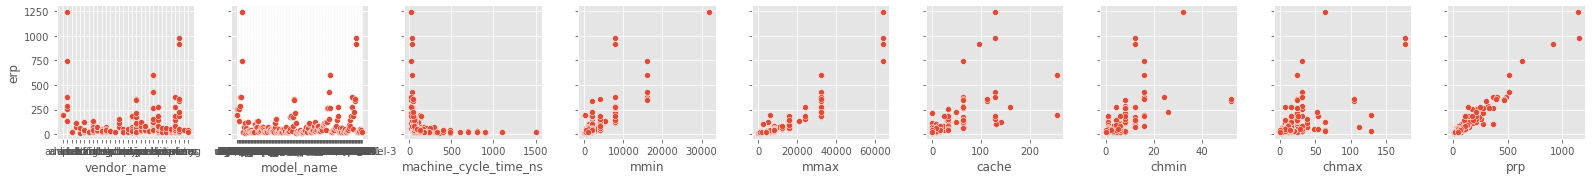

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
x= df.drop(['erp'], axis=1)
sns.pairplot(df, x_vars=x.columns, y_vars=['erp'])
plt.show()

In [103]:
df.drop(['vendor_name','model_name'],axis=1, inplace=True)
df

,machine_cycle_time_ns,mmin,mmax,cache,chmin,chmax,prp,erp
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [105]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)
scaled= pd.DataFrame(scaler.transform(df))
scaled.head()

,0,1,2,3,4,5,6,7
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759,0.645587
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277,0.995359
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877,0.995359
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710,0.995359
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405,0.211611


In [106]:
#Let's create numpy arrays for features and target
x = scaled.iloc[:, :-2].values 
y = scaled.iloc[:, -1:].values


In [107]:
x.shape,y.shape

((209, 6), (209, 1))

In [108]:
#splitting the dataset into training set and test set
# 'stratify=y' is not needed, because y is only one class.

from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.4, random_state=42)

In [109]:
#performing linesr regression 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train,y_train)
pred = model.predict(x_train)

In [110]:
#predicting values
y_pred = model.predict(x_test)

In [112]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE on test: ", mean_absolute_error(y_test, y_pred))
print("R2 score on test: ", r2_score(y_test, y_pred))

MAE on test:  0.2117426795880879
R2 score on test:  0.8202664954218212


In [113]:
print("MAE on train: ", mean_absolute_error(y_train, pred))
print("R2 score on train: ", r2_score(y_train, pred))

MAE on train:  0.09879074388932872
R2 score on train:  0.9490469754878647


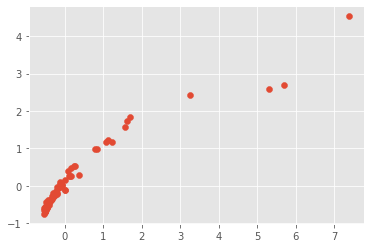

In [114]:
plt.scatter(y_test, y_pred)